### Load Libriaries

In [1]:
# for data transformation
import pandas as pd
import numpy as np

#to manupulate strings 
import re
import string

#for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# for text preprocessing
import nltk # natural language toolkit
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# for sentiments 
from textblob import TextBlob

# for using the bag of words model
from sklearn.feature_extraction.text import CountVectorizer

# download dictitionaries
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Decoded\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Decoded\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Decoded\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

### Reading the data

In [3]:
data = pd.read_csv('apple-tweets - apple-tweets.csv')
data.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
0,5746452.0,1.090000e+18,1548799817,waltmossberg,It’s true that @Apple likely overpriced the la...,Twitter for iPad,279,NaN,NaN,NaN,...,21783,31007,1178213411,True,https://t.co/AH9VhHsJmY,http://www.theverge.com/label/walt-mossberg-verge,en,https://pbs.twimg.com/profile_banners/5746452/...,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/4637351296...
1,5746452.0,1.090000e+18,1548800328,waltmossberg,@AaronSuplizio @Apple Yes it is.,Twitter for iPad,10,1.090000e+18,2.365419e+07,AaronSuplizio,...,21783,31007,1178213411,True,https://t.co/AH9VhHsJmY,http://www.theverge.com/label/walt-mossberg-verge,en,https://pbs.twimg.com/profile_banners/5746452/...,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/4637351296...
2,5746452.0,1.090000e+18,1548802301,waltmossberg,"@mvigod @Apple As I have said many times here,...",Twitter for iPad,259,1.090000e+18,2.224800e+08,mvigod,...,21783,31007,1178213411,True,https://t.co/AH9VhHsJmY,http://www.theverge.com/label/walt-mossberg-verge,en,https://pbs.twimg.com/profile_banners/5746452/...,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/4637351296...
3,5746452.0,1.090000e+18,1548800242,waltmossberg,I’m not saying that @Apple doesn’t have proble...,Twitter for iPad,270,1.090000e+18,5.746452e+06,waltmossberg,...,21783,31007,1178213411,True,https://t.co/AH9VhHsJmY,http://www.theverge.com/label/walt-mossberg-verge,en,https://pbs.twimg.com/profile_banners/5746452/...,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/4637351296...
4,1175221.0,1.090000e+18,1548737368,digiphile,@DaveLeeBBC @Apple @NYGovCuomo Nor I; saw it g...,Twitter for iPhone,88,1.090000e+18,1.251786e+09,DaveLeeBBC,...,165604,108196,1173899540,True,https://t.co/QWOxhaw2kk,https://digiphile.info/about/,en,https://pbs.twimg.com/profile_banners/1175221/...,http://abs.twimg.com/images/themes/theme15/bg.png,http://pbs.twimg.com/profile_images/1076306605...


In [4]:
tweets =data['text']

In [5]:
tweets[0]

'It’s true that @Apple likely overpriced the latest iPhones in a mature market, especially in China. And that it therefore overestimated revenues and earnings. But, people, please remember that the shortfall meant they took in “only” $84 billion in 90 days instead of $93 billion.'

### Data cleaning and preprocessing

In [15]:
sample = 'My first sentence.     MY SECOND SENTENCE!!! Cows and cars became had been... @Apple you suck!'

In [16]:
type(sample)

str

In [17]:
sample.lower()

'my first sentence.     my second sentence!!! cows and cars became had been... @apple you suck!'

In [18]:
sample.upper()

'MY FIRST SENTENCE.     MY SECOND SENTENCE!!! COWS AND CARS BECAME HAD BEEN... @APPLE YOU SUCK!'

In [19]:
re.sub('Cows','horse', sample)

'My first sentence.     MY SECOND SENTENCE!!! horse and cars became had been... @Apple you suck!'

In [21]:
# regex = regular expressions. see www.tutorialspoint.com/python/python_reg_expressions.html (check on regexr.comwor)
re.sub('\s+', ' ', sample)

'My first sentence. MY SECOND SENTENCE!!! Cows and cars became had been... @Apple you suck!'

In [23]:
words = word_tokenize(sample)
type(words)

list

In [24]:
sent_tokenize(sample)

['My first sentence.',
 'MY SECOND SENTENCE!!!',
 'Cows and cars became had been... @Apple you suck!']

In [27]:
words = word_tokenize(sample)

[WordNetLemmatizer().lemmatize(w, pos = 'v') for w in words] # reduces to inflectional form

['My',
 'first',
 'sentence',
 '.',
 'MY',
 'SECOND',
 'SENTENCE',
 '!',
 '!',
 '!',
 'Cows',
 'and',
 'cars',
 'become',
 'have',
 'be',
 '...',
 '@',
 'Apple',
 'you',
 'suck',
 '!']

In [29]:
# stopwords.words('english')

In [31]:
def clean(text):
    
    #lowercase everything
    text= text.lower()
    
    # remove extra space
    text = re.sub('\s+', ' ', text)
    
    # tokenize
    words = word_tokenize(text)
    
    words = [w for w in words if w.isalpha()] # keep alphabetical characters only
    
    # lemmatize it 
    
    words = [WordNetLemmatizer().lemmatize(w, pos= 'n') for w in words]
    words = [WordNetLemmatizer().lemmatize(w, pos= 'v') for w in words]
    words = [WordNetLemmatizer().lemmatize(w, pos= 'a') for w in words]
    
    # remove stopword
    words = [w for w in words if w not in stopwords.words('english')]
    
    # return as text
    text = ' '.join(words)
    
    return text

In [32]:
tweets = tweets.apply(lambda x: clean(x))

In [33]:
tweets[0]

'true apple likely overprice late iphones mature market especially china therefore overestimate revenue earn people please remember shortfall mean take billion day instead billion'

# Visualisation and modelling  http:decd.co/text-helpers

In [47]:
# Bag of words model
vector =CountVectorizer(max_features = 5000, min_df = 0.01)

vector

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=0.01,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [48]:
bag_of_words = vector.fit_transform(tweets)

bag_of_words # 9991 docs/tweets vs. 12256 unique terms/ features

<9991x162 sparse matrix of type '<class 'numpy.int64'>'
	with 50239 stored elements in Compressed Sparse Row format>

In [49]:
vector.get_feature_names()

['add',
 'airpods',
 'allow',
 'already',
 'also',
 'always',
 'amp',
 'android',
 'another',
 'answer',
 'app',
 'apple',
 'applesupport',
 'back',
 'bad',
 'battery',
 'best',
 'big',
 'break',
 'bug',
 'buy',
 'ca',
 'call',
 'camera',
 'change',
 'charge',
 'come',
 'company',
 'could',
 'customer',
 'data',
 'day',
 'device',
 'disable',
 'doe',
 'eavesdrop',
 'even',
 'ever',
 'every',
 'facebook',
 'facetime',
 'feature',
 'find',
 'first',
 'fix',
 'fuck',
 'get',
 'give',
 'glitch',
 'go',
 'good',
 'google',
 'great',
 'group',
 'guy',
 'ha',
 'happen',
 'hear',
 'help',
 'hey',
 'http',
 'io',
 'ipad',
 'iphone',
 'iphones',
 'issue',
 'job',
 'keep',
 'know',
 'last',
 'late',
 'let',
 'life',
 'like',
 'listen',
 'lol',
 'long',
 'look',
 'lose',
 'love',
 'mac',
 'make',
 'many',
 'market',
 'mean',
 'microsoft',
 'money',
 'month',
 'much',
 'music',
 'na',
 'need',
 'never',
 'new',
 'next',
 'old',
 'one',
 'pay',
 'people',
 'phone',
 'please',
 'price',
 'privacy',
 

In [50]:
sum_words = bag_of_words.sum(axis = 0)

words_freq = [(word, sum_words[0, idx]) for word, idx in vector.vocabulary_.items()]

words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

words_freq

[('apple', 11473),
 ('http', 3499),
 ('iphone', 1271),
 ('get', 1115),
 ('facetime', 1007),
 ('phone', 935),
 ('new', 705),
 ('like', 638),
 ('make', 635),
 ('fix', 622),
 ('go', 601),
 ('wa', 578),
 ('use', 531),
 ('need', 528),
 ('bug', 518),
 ('applesupport', 501),
 ('good', 496),
 ('ha', 490),
 ('one', 481),
 ('work', 432),
 ('time', 431),
 ('call', 431),
 ('amp', 414),
 ('think', 413),
 ('people', 412),
 ('update', 404),
 ('would', 393),
 ('know', 364),
 ('please', 353),
 ('shit', 348),
 ('take', 340),
 ('say', 338),
 ('app', 334),
 ('year', 326),
 ('want', 324),
 ('thank', 323),
 ('even', 320),
 ('buy', 317),
 ('still', 310),
 ('let', 294),
 ('privacy', 294),
 ('see', 293),
 ('come', 292),
 ('google', 290),
 ('really', 286),
 ('android', 282),
 ('watch', 280),
 ('back', 277),
 ('answer', 272),
 ('product', 271),
 ('day', 258),
 ('fuck', 257),
 ('user', 255),
 ('io', 250),
 ('love', 248),
 ('price', 244),
 ('look', 242),
 ('try', 238),
 ('pay', 237),
 ('issue', 232),
 ('give', 228

http 3499
iphone 1271
get 1115
facetime 1007
phone 935
new 705
like 638
make 635
fix 622
go 601
wa 578
use 531
need 528
bug 518
applesupport 501
good 496
ha 490
one 481
work 432
time 431
call 431
amp 414
think 413
people 412
update 404
would 393
know 364
please 353
shit 348


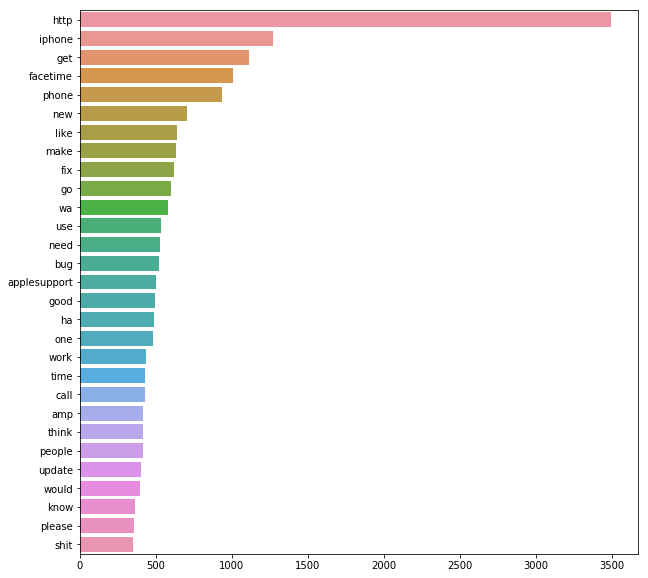

In [51]:
# ignoring top word (which is "apple" in this case)
top_words = words_freq[1:30]

for word, freq in top_words:
    print(word, freq)


word = []
count = []

for i, j in top_words: 
    word.append(i)
    count.append(j)


plt.figure(figsize = (10,10))

sns.barplot(x = count, y = word)


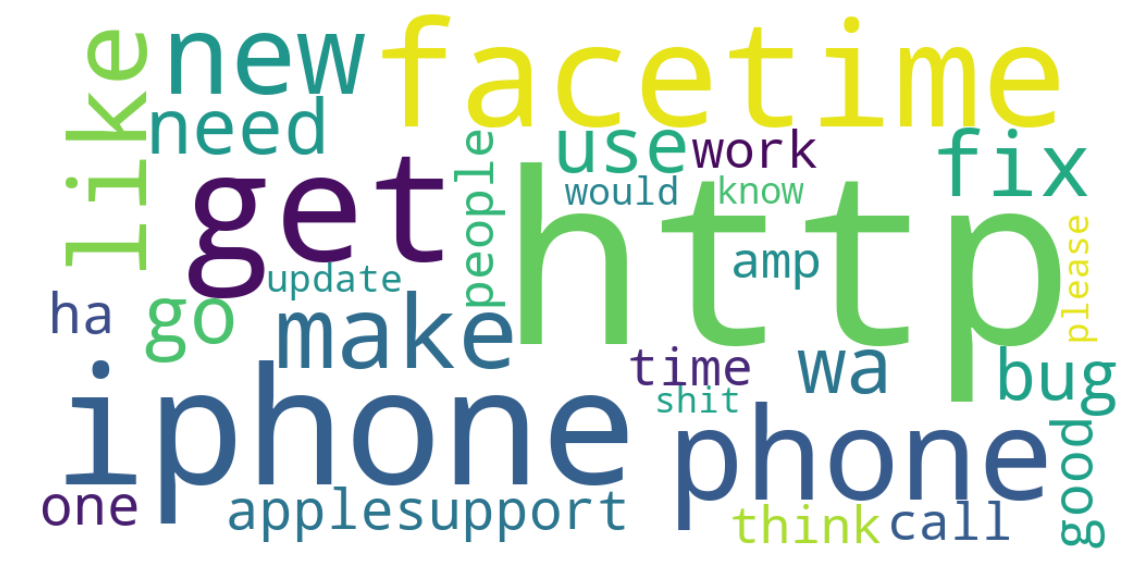

In [52]:
# wordcloud requires a dict with { word : frequency }
words_dict = {}
for k,v in top_words:
    words_dict[k] = int(v)

wordcloud = WordCloud(width=1000, height=500, background_color="white").generate_from_frequencies(words_dict)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Sentiments

In [54]:
tweets[0]

'true apple likely overprice late iphones mature market especially china therefore overestimate revenue earn people please remember shortfall mean take billion day instead billion'

In [55]:
TextBlob(tweets[0]).sentiment

Sentiment(polarity=-0.027083333333333334, subjectivity=0.6729166666666666)

In [59]:
tweets[141]

'apple welcome century apple slave http'

In [60]:
TextBlob(tweets[141]).sentiment

Sentiment(polarity=0.8, subjectivity=0.9)

In [62]:
sentiments = []

for tweet in tweets:
    analysis = TextBlob(tweet)
    sentiments.append(analysis.sentiment.polarity)



tweets_df = pd.DataFrame(tweets)

tweets_df['sentiments'] = sentiments

tweets_df

,text,sentiments
0,true apple likely overprice late iphones matur...,-0.027083
1,aaronsuplizio apple yes,0.000000
2,mvigod apple say many time regard multiple com...,0.000000
3,say apple problem challenge doe say perspectiv...,0.000000
4,daveleebbc apple nygovcuomo saw go track confi...,0.000000
5,apple ha disable group facetime http unexpecte...,-0.086061
6,wish amp apple tweet statement medium identify...,-0.300000
7,word time fix amp apple http,0.000000
8,daveleebbc apple nygovcuomo use back want opin...,-0.025000
9,apple big welfare taker time billion tax favor...,0.000000


T:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


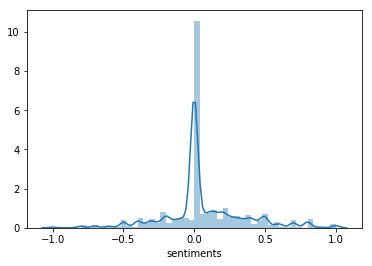

In [63]:
sns.distplot(tweets_df['sentiments'])

In [64]:
# find most positive tweets
positive = tweets_df.sort_values(by = 'sentiments', ascending=False)
positive = positive.reset_index(drop=True)

positive

,text,sentiments
0,apple awesome look forward,1.00
1,apple wonderful,1.00
2,perfect even click image ar bali indonesia app...,1.00
3,apple look delicious,1.00
4,apple one best ad ever see,1.00
5,apple awesome,1.00
6,applesupport apple problem iphones trade other...,1.00
7,ad cmos pick best congratulation airbnb apple ...,1.00
8,best ever http,1.00
9,instagram implantation volume bar x best could...,1.00


In [65]:
# find most negative tweets
negative = tweets_df.sort_values(by='sentiments', ascending=True)
negative = negative.reset_index(drop=True)

negative

,text,sentiments
0,sharatibken ftc qualcomm apple samsung assume ...,-1.00
1,applesupport terrible build quality apple acce...,-1.00
2,evil bastard apple make computer usa verge htt...,-1.00
3,wilderheartco apple arianagrande horrible,-1.00
4,apple io release ha nasty surprise apple http,-1.00
5,dear apple result slowdown iphone sale china c...,-1.00
6,wire bug nasty happen differentiate apple act ...,-1.00
7,arjwright apple understand default insane keep...,-1.00
8,vzwsupport either apple need fix conference ca...,-1.00
9,maniltongya maple apple applesupport never exp...,-1.00


In [66]:
# Other data discritionaries = vader